In [2]:
import pandas as pd 
import numpy as np

In [3]:
## Load data
data = pd.read_csv('/home/jokerr/jupyter_nb/Projects/pima_indian_diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
## Data info.
data.columns # ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data.shape   # (768,9)
data.isna().sum() # No null values
data.info()       # data type & no. of items in each column
data.describe()   # Descriptive stats.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
## Set features and target
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

## Split data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=11)

In [24]:
## Model
from sklearn.svm import SVC
model=SVC().fit(x_train,y_train)
pred=model.predict(x_test)

In [39]:
### Model Evaluation
## confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
TN,FP,FN,TP=confusion_matrix(y_test,pred).ravel()
# TN=139 FP=10 FN=48 TP=34 

## Display confusion matrix
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='viridis',) 

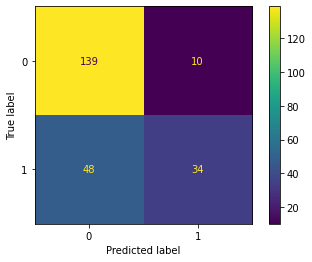

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_test,pred)     # (TP+TN)/(TP+FP+TN+FN)
precision_score(y_test,pred)    # TP/(TP+FP)
recall_score(y_test,pred)       # TP/(TP+FN)
f1_score(y_test,pred)

from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=['0','1'])) ## all at once

0.5396825396825397

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       149
           1       0.77      0.41      0.54        82

    accuracy                           0.75       231
   macro avg       0.76      0.67      0.68       231
weighted avg       0.75      0.75      0.73       231



In [54]:
# 
TP/(TP+FN)

0.4146341463414634

In [ ]:
NCxx4dvC6ChsxfD